In [2]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


from subprocess import call
call(["python", "C:\\Users\\z5130037\\Desktop\\Udacity\\Camera_calibaration\\CarND-Camera-Calibration-master\\CarND-Camera-Calibration-master\\camera_calibration.ipynb"])

In [3]:
# Read in the saved camera matrix and distortion coefficients
# These are the arrays you calculated using cv2.calibrateCamera()
# and this the adress of cv2.calibrateCamera()::\Users\z5130037\Desktop\Udacity\Camera_calibaration\CarND-Camera-Calibration-master\CarND-Camera-Calibration-master\calibration_wide
dist_pickle = pickle.load( open( "C:\\Users\\z5130037\\Desktop\\Udacity\\Camera_calibaration\\CarND-Camera-Calibration-master\\CarND-Camera-Calibration-master\\calibration_wide\\wide_dist_pickle.p", "rb" ) )
#dist_pickle = pickle.load( open( "wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]
print(mtx)
print(dist)

[[560.26807546   0.         651.26187093]
 [  0.         561.31848514 499.05499505]
 [  0.           0.           1.        ]]
[[-2.32876197e-01  6.16787717e-02 -1.40125719e-05  3.82158200e-05
  -7.54073037e-03]]


In [4]:
# Read in an image
#img = cv2.imread('test_image2.png')
#img = cv2.imread('GOPRO00032.jpg')
img = cv2.imread('C:\\Users\\z5130037\\Desktop\\Udacity\\Camera_calibaration\\CarND-Camera-Calibration-master\\CarND-Camera-Calibration-master\\calibration_wide\\test_image.jpg')
nx = 8 # the number of inside corners in x
ny = 6 # the number of inside corners in y
#img.show()
cv2.imshow('sample image',img)

In [5]:
#undist = cv2.undistort(img, mtx, dist, None, mtx)

#go through this link : https://adventuresandwhathaveyou.wordpress.com/category/coding-2/

In [15]:
# MODIFY THIS FUNCTION TO GENERATE OUTPUT 
# THAT LOOKS LIKE THE IMAGE ABOVE
def corners_unwarp(img, nx, ny, mtx, dist):
    # Pass in your image into this function
    # Write code to do the following steps
    # 1) Undistort using mtx and dist
     # Use the OpenCV undistort() function to remove distortion
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    # 2) Convert to grayscale
    # Convert undistorted image to grayscale
    gray = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY)
    # 3) Find the chessboard corners
    # Search for corners in the grayscaled image
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    # 4) If corners found: 
    if ret == True:
            # a) draw corners
            # If we found corners, draw them! (just for fun)
        cv2.drawChessboardCorners(undist, (nx, ny), corners, ret)
        # Choose offset from image corners to plot detected corners
        # This should be chosen to present the result at the proper aspect ratio
        # My choice of 100 pixels is not exact, but close enough for our purpose here
        offset = 100 # offset for dst points
        # Grab the image shape
        img_size = (gray.shape[1], gray.shape[0])
        
            # b) define 4 source points src = np.float32([[,],[,],[,],[,]])
            # For source points I'm grabbing the outer four detected corners
        src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
                 #Note: you could pick any four of the detected corners 
                 # as long as those four corners define a rectangle
                 #One especially smart way to do this would be to use four well-chosen
                 # corners that were automatically detected during the undistortion steps
                 #We recommend using the automatic detection of corners in your code
                 
            # c) define 4 destination points dst = np.float32([[,],[,],[,],[,]])
        # For destination points, I'm arbitrarily choosing some points to be
        # a nice fit for displaying our warped result 
        # again, not exact, but close enough for our purposes
        dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                                     [img_size[0]-offset, img_size[1]-offset], 
                                     [offset, img_size[1]-offset]])    
            # d) use cv2.getPerspectiveTransform() to get M, the transform matrix
            # Given src and dst points, calculate the perspective transform matrix
        M = cv2.getPerspectiveTransform(src, dst)
            # e) use cv2.warpPerspective() to warp your image to a top-down view
            # Warp the image using OpenCV warpPerspective()
        warped = cv2.warpPerspective(undist, M, img_size)
    #delete the next two lines
    
    return warped, M

In [16]:
top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)



TypeError: cannot unpack non-iterable NoneType object

NameError: name 'top_down' is not defined

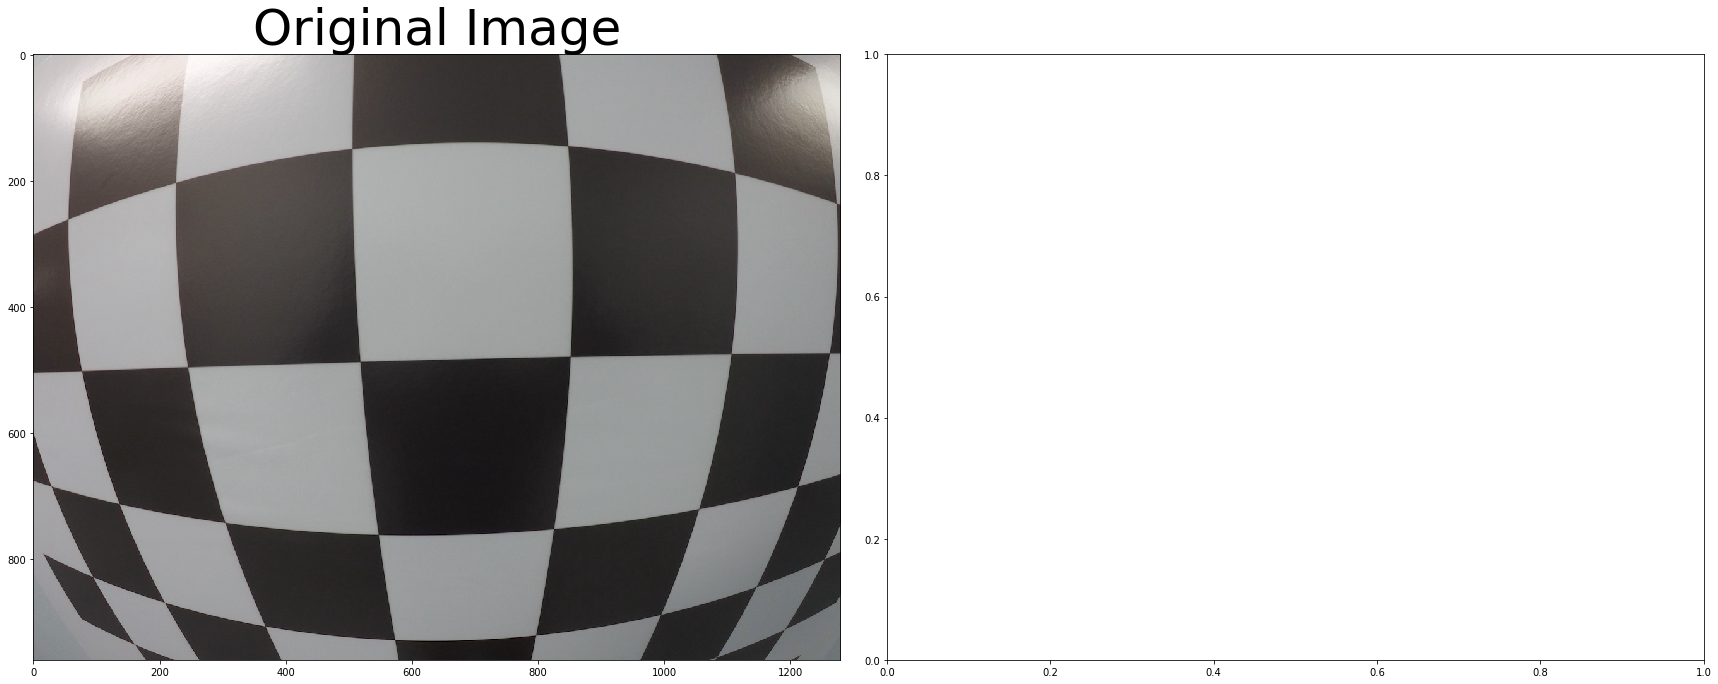

In [11]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)